In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
real_estate_data = pd.read_csv('/content/drive/MyDrive/CS641_Project/realtor-data.zip.csv')
real_estate_data.head(3)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN


# Exploratory Data Analysis

<ipython-input-25-c2939756c4ec>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_price, shade=True, color='blue')


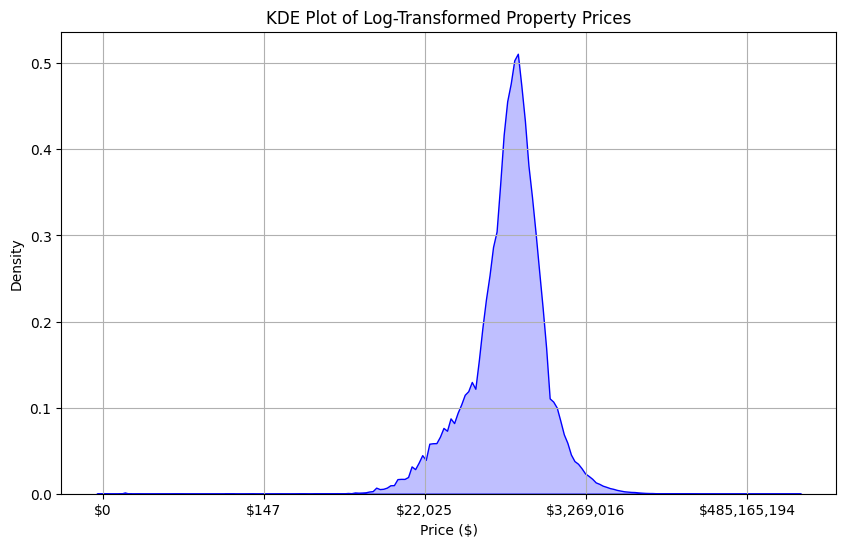

In [ ]:


#Visualization

# Visualizing the distribution of property prices
from matplotlib.ticker import FuncFormatter

# Log-transform the price data
log_price = np.log1p(real_estate_data['price'])

# Function to format x-axis labels
def format_price(value, tick_number):
    return f'${int(np.expm1(value)):,}'

# Create KDE plot for log-transformed price
plt.figure(figsize=(10, 6))
sns.kdeplot(log_price, shade=True, color='blue')

# Format x-axis labels to display actual prices
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_price))

# Add titles and labels
plt.title('KDE Plot of Log-Transformed Property Prices')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.grid(True)

plt.show()

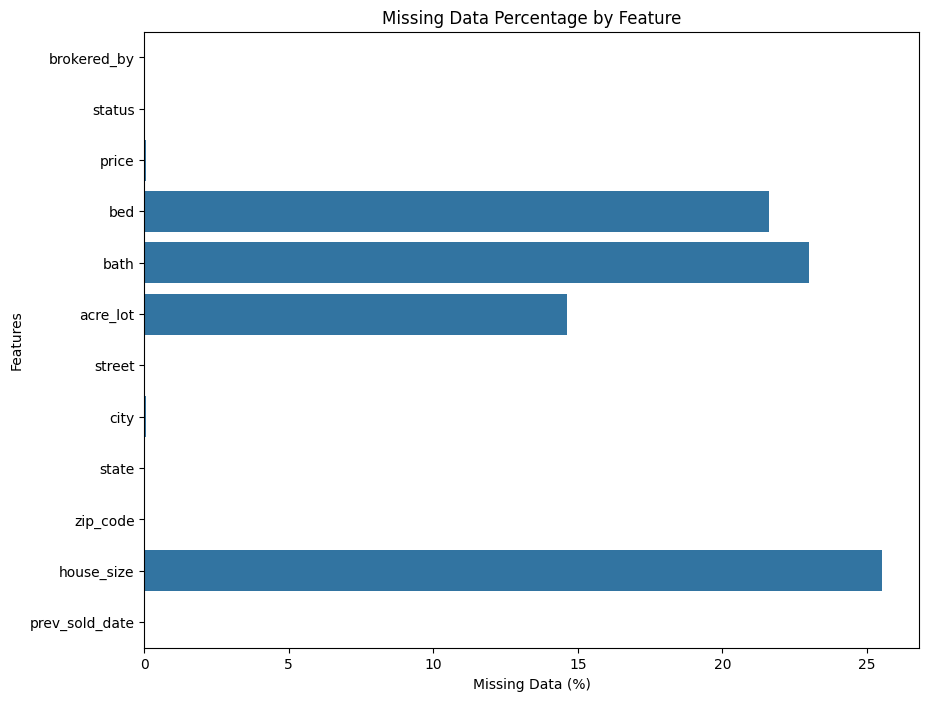

In [ ]:
# Handling missing data and visualizing missing value percentages

# Fill missing entries in 'prev_sold_date' with a placeholder value "not sold before"
real_estate_data['prev_sold_date'].fillna("not sold before", inplace=True)

# Define a function to compute the proportion of missing values in each column
def compute_missing_percentage(df):
    missing_percent = df.isnull().mean() * 100  # Compute percentage of missing data per column
    return missing_percent.reset_index().rename(columns={0: 'Missing_Percentage', 'index': 'Feature'})

# Get missing value percentages for each feature and create a bar chart
missing_percent = compute_missing_percentage(real_estate_data)
plt.figure(figsize=(10, 8))  # Customize plot dimensions
sns.barplot(data=missing_percent, x='Missing_Percentage', y='Feature')  # Bar plot with seaborn
plt.title('Missing Data Percentage by Feature')  # Plot title
plt.xlabel('Missing Data (%)')  # Label for x-axis
plt.ylabel('Features')  # Label for y-axis
plt.show()  # Render the plot

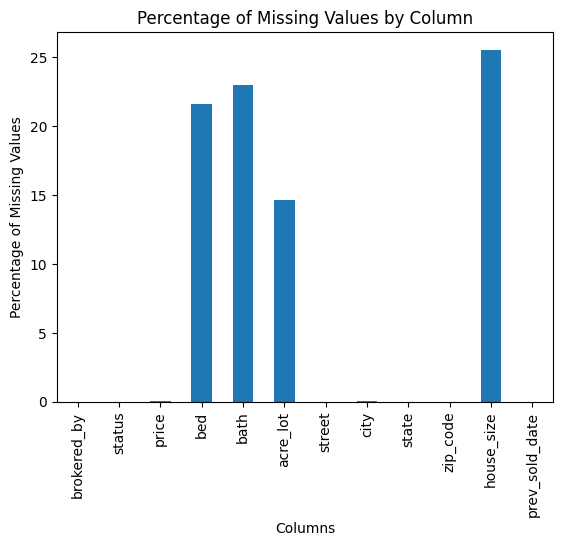

In [ ]:



#visualizing missing data

# Calculating percentage of missing values
missing_percentage = (real_estate_data.isna().sum() / len(real_estate_data)) * 100

# Ploting the percentages
missing_percentage.plot(kind="bar")
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.show()




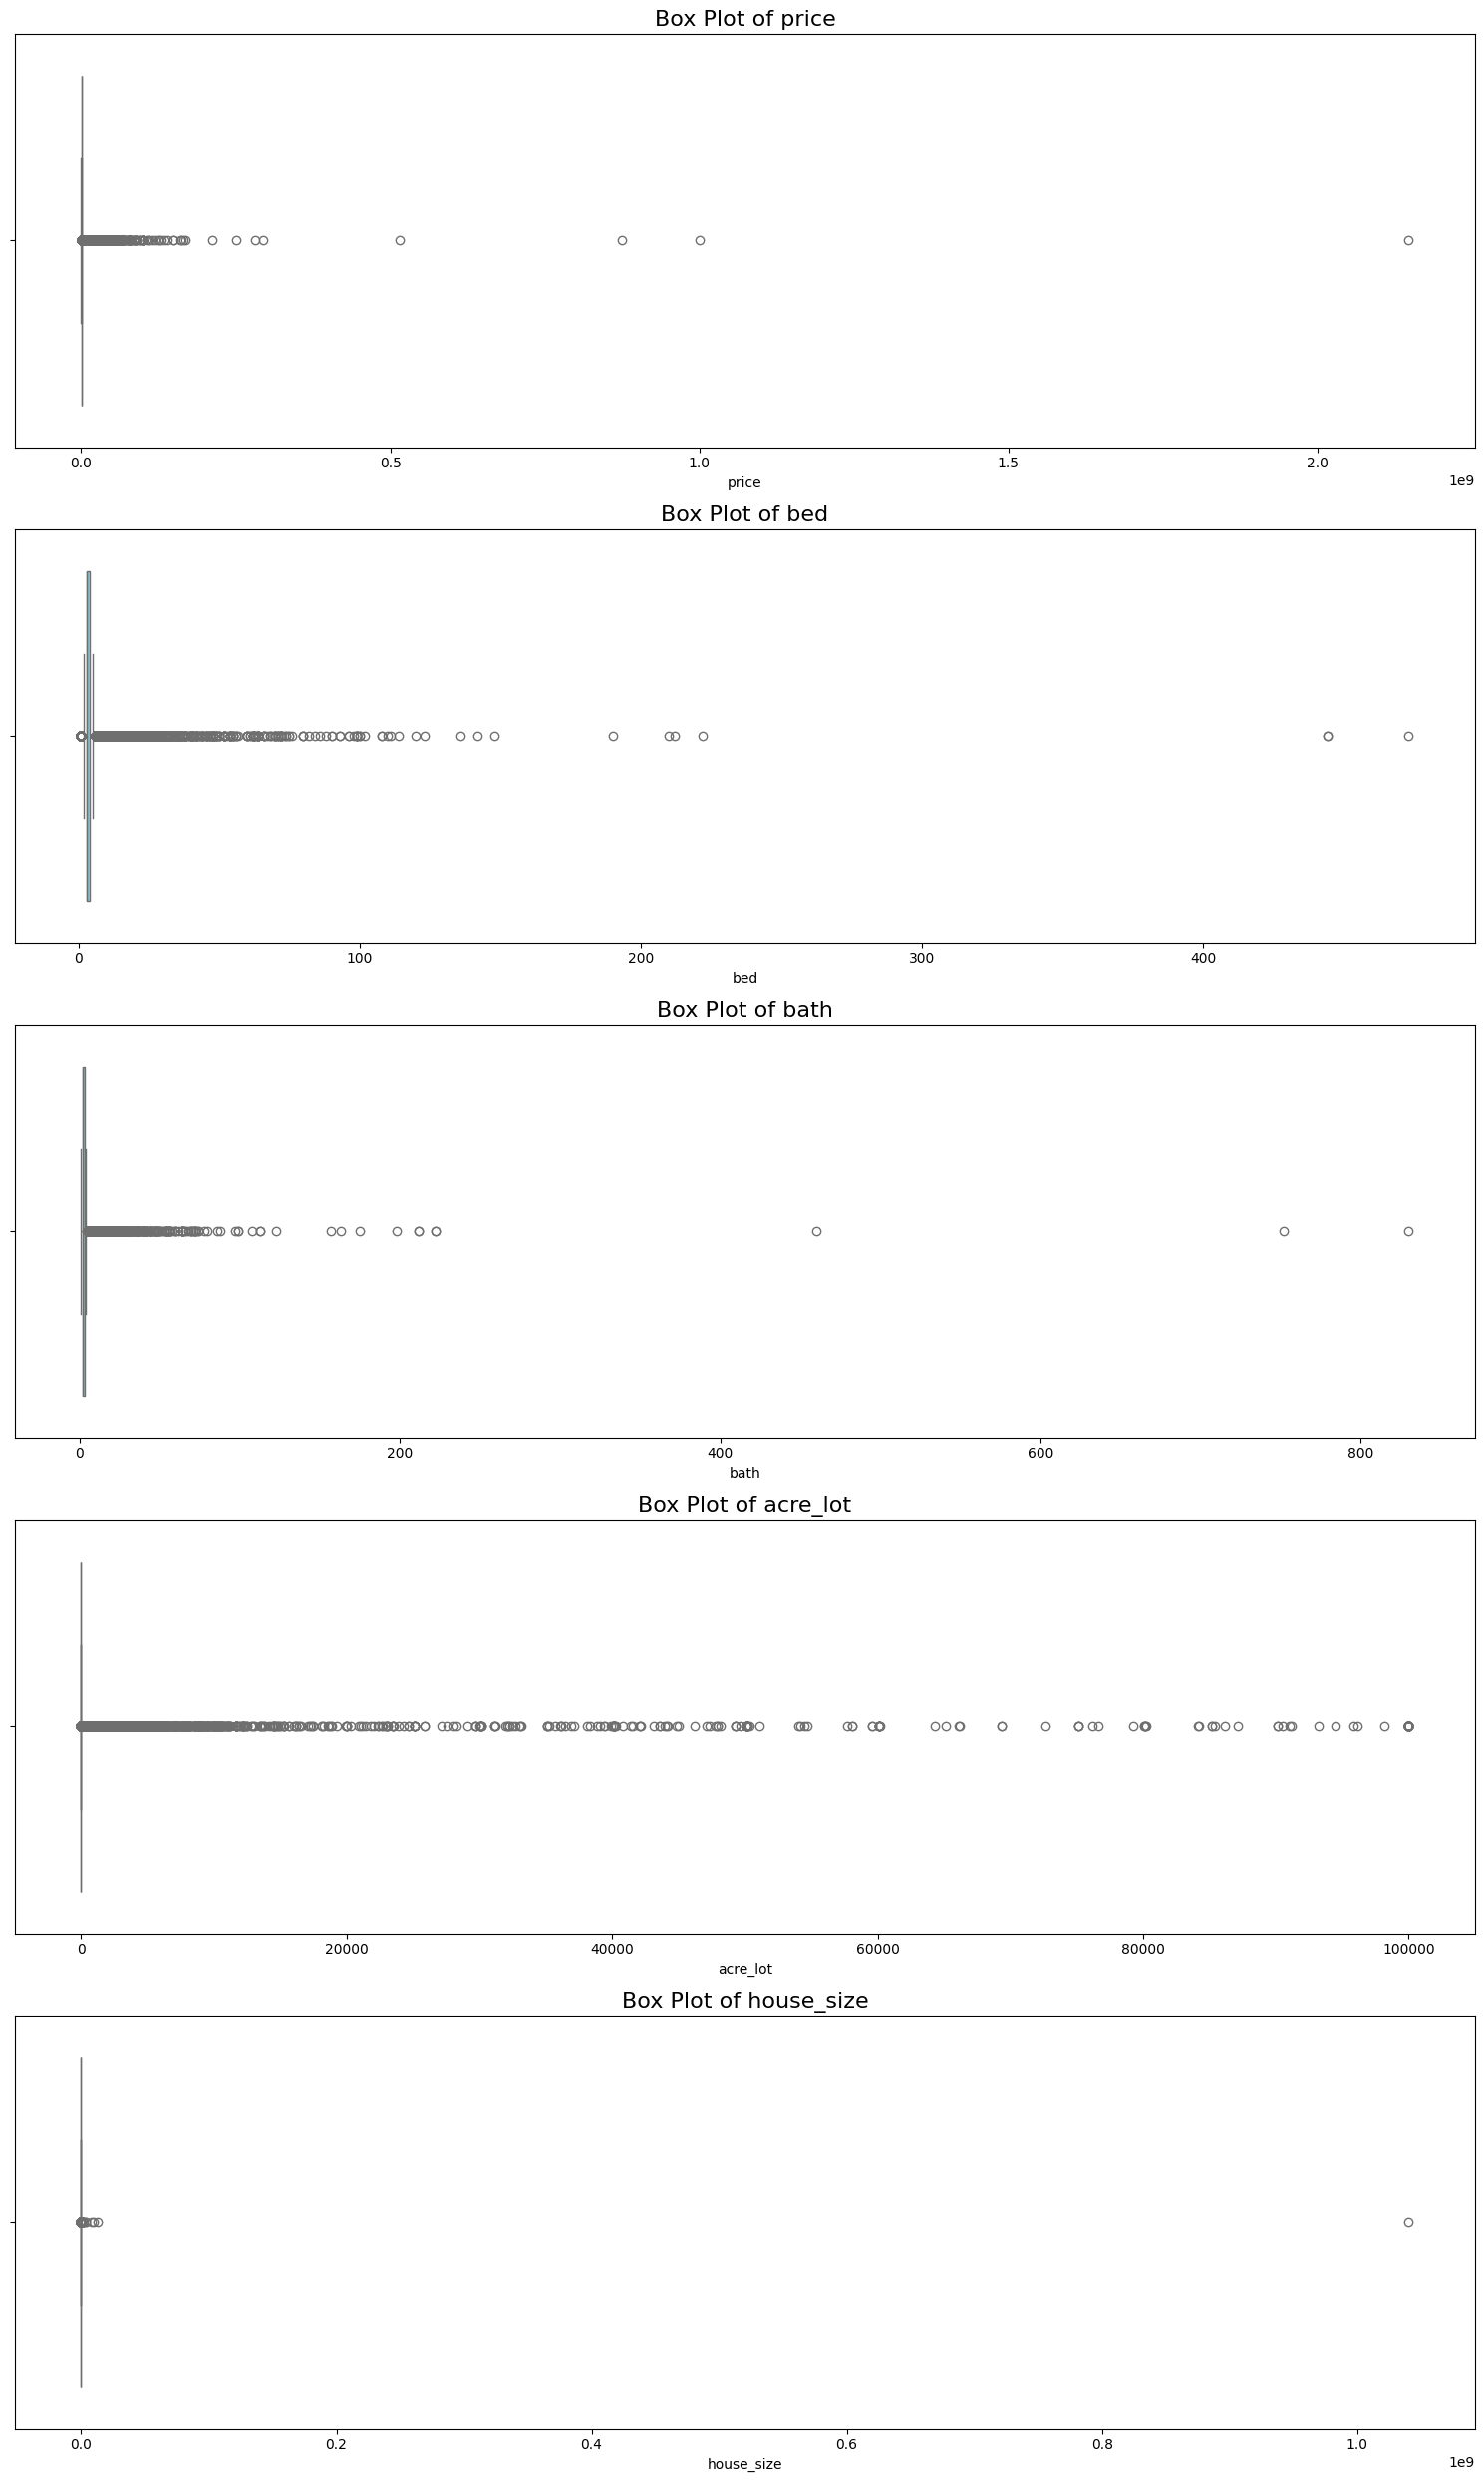

In [ ]:
#visualizing outliers for numeric columns


numeric_columns = real_estate_data.select_dtypes(include=['float64', 'int64']).columns

# Create a figure with subplots for each numeric column
plt.figure(figsize=(15, len(numeric_columns) * 5))

# Plot box plots for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=real_estate_data[column], color='skyblue')
    plt.title(f'Box Plot of {column}', fontsize=16)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

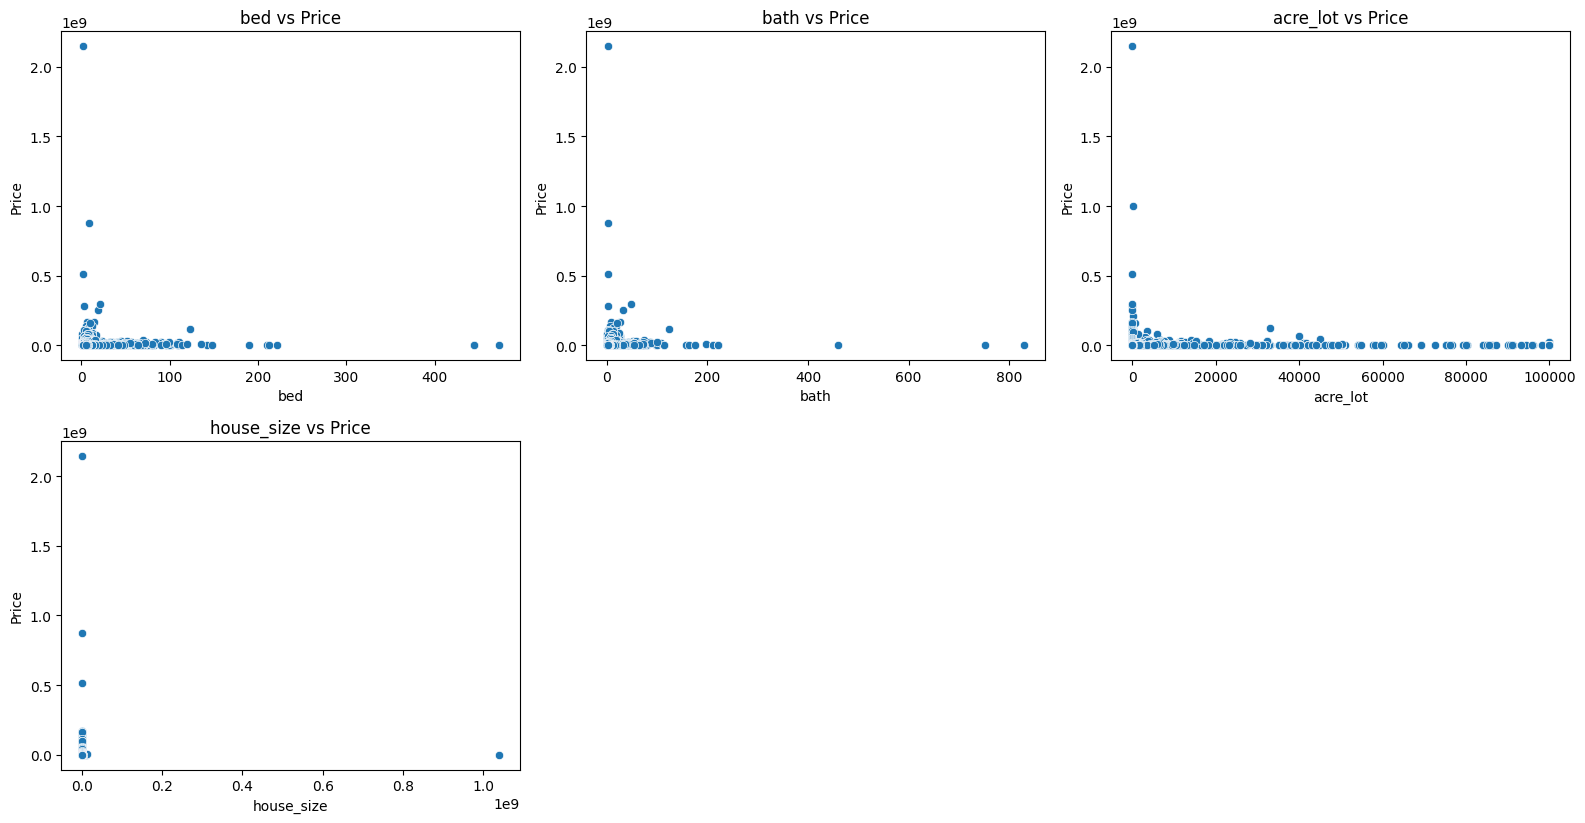

In [ ]:
# features vs price

numeric_features = real_estate_data.select_dtypes(include=['number']).columns

# Remove the target variable 'price' from the list of numeric features
numeric_features = [col for col in numeric_features if col != 'price']

# Plotting each numeric feature vs. price
plt.figure(figsize=(16, 12))

for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)  # Adjust the number of rows and columns based on the number of features
    sns.scatterplot(data=real_estate_data, x=feature, y='price')
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Data Cleaning and Preparation

In [ ]:


# Data Cleaning
# Data Statistics, conversion to string, check for nan values
real_estate_data['brokered_by'] = real_estate_data['brokered_by'].astype(str)
real_estate_data['street'] = real_estate_data['street'].astype(str)
real_estate_data['zip_code'] = real_estate_data['zip_code'].astype(str)


print(real_estate_data.describe())


print(real_estate_data.info())


print(real_estate_data.isna().sum())

              price           bed          bath      acre_lot    house_size
count  2.224841e+06  1.745065e+06  1.714611e+06  1.900793e+06  1.657898e+06
mean   5.241955e+05  3.275841e+00  2.496440e+00  1.522303e+01  2.714471e+03
std    2.138893e+06  1.567274e+00  1.652573e+00  7.628238e+02  8.081635e+05
min    0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  4.000000e+00
25%    1.650000e+05  3.000000e+00  2.000000e+00  1.500000e-01  1.300000e+03
50%    3.250000e+05  3.000000e+00  2.000000e+00  2.600000e-01  1.760000e+03
75%    5.500000e+05  4.000000e+00  3.000000e+00  9.800000e-01  2.413000e+03
max    2.147484e+09  4.730000e+02  8.300000e+02  1.000000e+05  1.040400e+09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     object 
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64


In [ ]:
"""The steps involved in the data cleaning process are: removing rows with NaN values in the 'price' column, followed by removing rows with more than two NaN values.
Next, NaN values in the 'house_size' column are filled with the median. The average number of baths is calculated for each bed count and merged with the dataset to fill missing values in the 'bath' column.
Afterward, the 'bath_avg' column is dropped, and NaN values in the 'bed' column are filled with the median. Finally, the percentage of remaining NaN values is recalculated and printed."""

# Cleaning the data by removing rows with NaN values in 'price', handling other missing values, and recalculating NaN percentages

real_estate_data_clean = real_estate_data.dropna(subset=['price'])
real_estate_data_clean = real_estate_data_clean[real_estate_data_clean.isnull().sum(axis=1) < 3]
real_estate_data_clean['house_size'].fillna(real_estate_data_clean['house_size'].median(), inplace=True)

avg_bath_per_bed = real_estate_data_clean.groupby('bed')['bath'].mean().round(0).reset_index()
avg_bath_per_bed.columns = ['bed', 'average_bath']
real_estate_data_clean = real_estate_data_clean.merge(avg_bath_per_bed, on='bed', how='left')
real_estate_data_clean['bath'].fillna(real_estate_data_clean['average_bath'], inplace=True)
real_estate_data_clean.drop(columns=['average_bath'], inplace=True)

real_estate_data_clean['bed'].fillna(real_estate_data_clean['bed'].median(), inplace=True)

nan_percentage_clean = compute_missing_percentage(real_estate_data_clean)
print(nan_percentage_clean)


<ipython-input-5-550efe846e90>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate_data_clean['house_size'].fillna(real_estate_data_clean['house_size'].median(), inplace=True)


           Feature  Missing_Percentage
0      brokered_by            0.000000
1           status            0.000000
2            price            0.000000
3              bed            0.000000
4             bath            0.665108
5         acre_lot           17.191010
6           street            0.000000
7             city            0.021644
8            state            0.000000
9         zip_code            0.000000
10      house_size            0.000000
11  prev_sold_date            0.000000


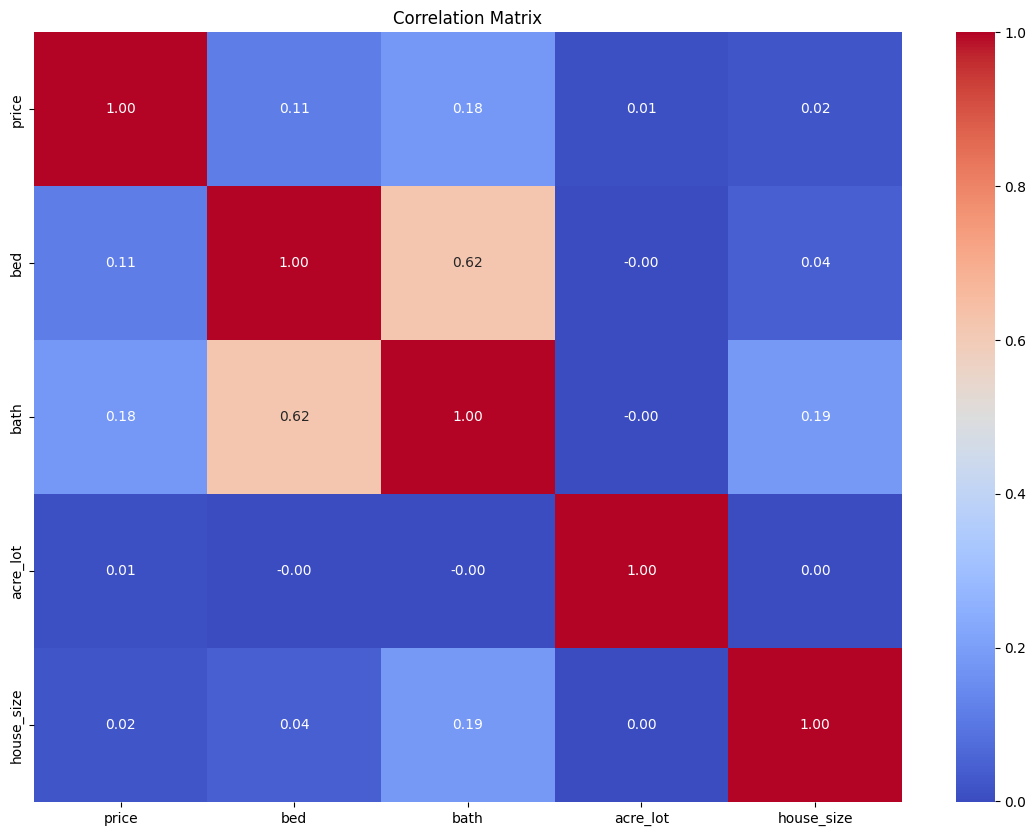

In [ ]:
# Creating and visualizing the correlation matrix for numeric columns

cor_matrix = real_estate_data_clean.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(cor_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

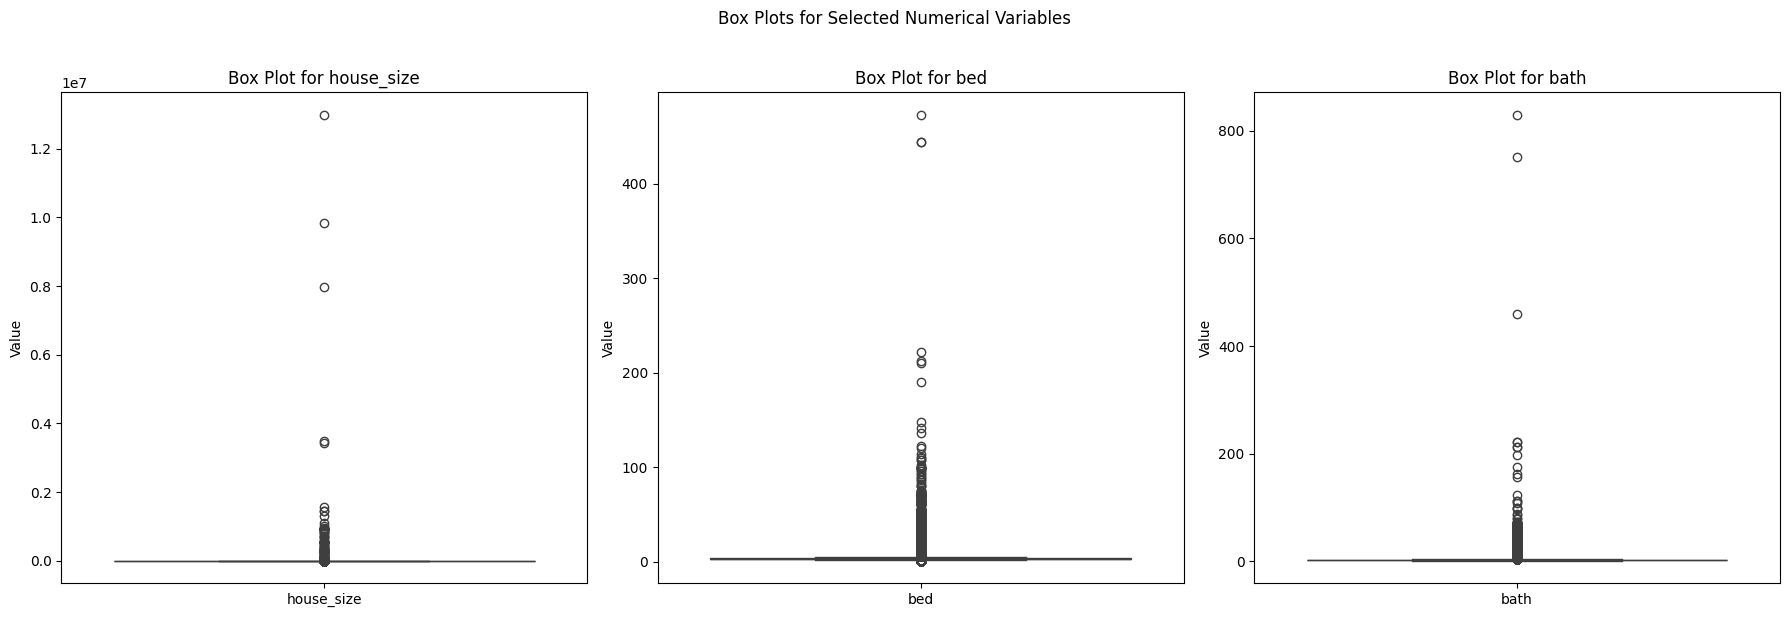

In [ ]:
# Reshaping the data and creating box plots to visualize outliers

long_data = pd.melt(real_estate_data_clean, id_vars=['price'], value_vars=['house_size', 'bed', 'bath'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

variables = ['house_size', 'bed', 'bath']

for ax, var in zip(axes, variables):
    sns.boxplot(x='variable', y='value', data=long_data[long_data['variable'] == var], ax=ax)
    ax.set_title(f'Box Plot for {var}')
    ax.set_xlabel('')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x')

fig.suptitle('Box Plots for Selected Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
# Removing rows with NaN values and filtering outliers based on specified quantiles

real_estate_data_final = real_estate_data_clean.dropna(subset=['price'])

real_estate_data_final = real_estate_data_final[
    (real_estate_data_final['house_size'] > real_estate_data_final['house_size'].quantile(0.001)) &
    (real_estate_data_final['house_size'] < real_estate_data_final['house_size'].quantile(0.99)) &
    (real_estate_data_final['bed'] > 0) &
    (real_estate_data_final['bed'] < real_estate_data_final['bed'].quantile(0.99)) &
    (real_estate_data_final['bath'] > 0) &
    (real_estate_data_final['bath'] < real_estate_data_final['bath'].quantile(0.99)) &
    (real_estate_data_final['price'] > real_estate_data_final['price'].quantile(0.001)) &
    (real_estate_data_final['price'] < real_estate_data_final['price'].quantile(0.9))
]


In [ ]:
# Standardize city names by replacing "New York" with "New York City"
real_estate_data_final['city'] = real_estate_data_final['city'].replace(
    to_replace=["New York", "New York City"], value="New York City")

# Display the first few rows where the city is "New York City" to verify the update
real_estate_data_final.query('city == "New York City"').head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
35467,29034.0,for_sale,210000.0,1.0,1.0,NaN,1438575.0,New York City,New York,10471.0,1760.0,not sold before
35468,29034.0,for_sale,775000.0,1.0,2.0,NaN,1314541.0,New York City,New York,10022.0,1760.0,not sold before
35471,8514.0,for_sale,749000.0,1.0,1.0,NaN,680528.0,New York City,New York,10128.0,1760.0,not sold before
35472,29034.0,for_sale,899000.0,1.0,2.0,NaN,78222.0,New York City,New York,10023.0,1760.0,not sold before
35476,92928.0,for_sale,395000.0,3.0,1.0,0.29,1213769.0,New York City,New York,10022.0,650.0,not sold before


In [ ]:
# Summarizing state, city, and street data for various statistics

# Aggregating statistics for states with more than 40,000 rows
state_stats = real_estate_data_final.groupby('state').agg(
    total_count=('price', 'size'),
    total_price=('price', 'sum'),
    mean_price=('price', 'mean')
).reset_index()

state_stats = state_stats[state_stats['total_count'] > 40000]

# Generating statistics for each city and state, filtering out empty entries
city_stats = real_estate_data_final.groupby(['city', 'state']).agg(
    total_count=('price', 'size'),
    total_price=('price', 'sum'),
    mean_price=('price', 'mean')
).reset_index()

city_stats = city_stats.loc[(city_stats['city'] != "") & (city_stats['state'] != "")]

# Calculating statistics for each street
street_stats = real_estate_data_final.groupby('street').agg(
    total_count=('price', 'size'),
    total_price=('price', 'sum'),
    mean_price=('price', 'mean')
).reset_index()

print(state_stats, city_stats, street_stats)


             state  total_count   total_price     mean_price
2          Arizona        53325  2.284184e+10  428351.471917
4       California       139258  8.030383e+10  576655.030440
9          Florida       168903  6.363901e+10  376778.456825
10         Georgia        58930  2.098363e+10  356077.285372
14        Illinois        68811  2.041279e+10  296650.131563
33        New York        67209  2.673756e+10  397827.085271
34  North Carolina        51853  1.770057e+10  341360.504425
36            Ohio        48666  1.120894e+10  230323.829552
39    Pennsylvania        63852  1.917948e+10  300373.928115
45           Texas       155520  5.644544e+10  362946.477087
49        Virginia        50797  2.139866e+10  421258.393291
50      Washington        45282  2.386065e+10  526934.638333                     city           state  total_count  total_price  \
0      21 27 Tommie Lane  North Carolina            1     330000.0   
1             Aaronsburg    Pennsylvania            2     504999.0 

In [ ]:
# Merge 'avg_price' from state_stats with the main DataFrame on 'state'
real_estate_data_final = real_estate_data_final.merge(state_stats[['state', 'mean_price']],
                                                      on='state', suffixes=('', '_state'))

# Merge 'avg_price' from city_stats with the main DataFrame on 'city' and 'state'
real_estate_data_final = real_estate_data_final.merge(city_stats[['city', 'state', 'mean_price']],
                                                      on=['city', 'state'], suffixes=('', '_city'))

# Merge 'avg_price' from street_stats with the main DataFrame on 'street'
real_estate_data_final = real_estate_data_final.merge(street_stats[['street', 'mean_price']],
                                                      on='street', suffixes=('', '_street'))

# Filter rows where 'total_count' in 'state_stats' is greater than 20,000
filtered_states = state_stats.loc[state_stats['total_count'] > 20000, 'state']

# Keep rows in real_estate_data_final where 'state' is in the filtered states
real_estate_data_final = real_estate_data_final.loc[real_estate_data_final['state'].isin(filtered_states)]


In [ ]:
# Create a new column for the ratio of bedrooms to bathrooms
real_estate_data_final['bed_bath_ratio'] = real_estate_data_final.eval('bed / bath')

# Create a new column for the interaction between house size and the number of bathrooms
real_estate_data_final['size_bath_interaction'] = real_estate_data_final.eval('house_size * bath')


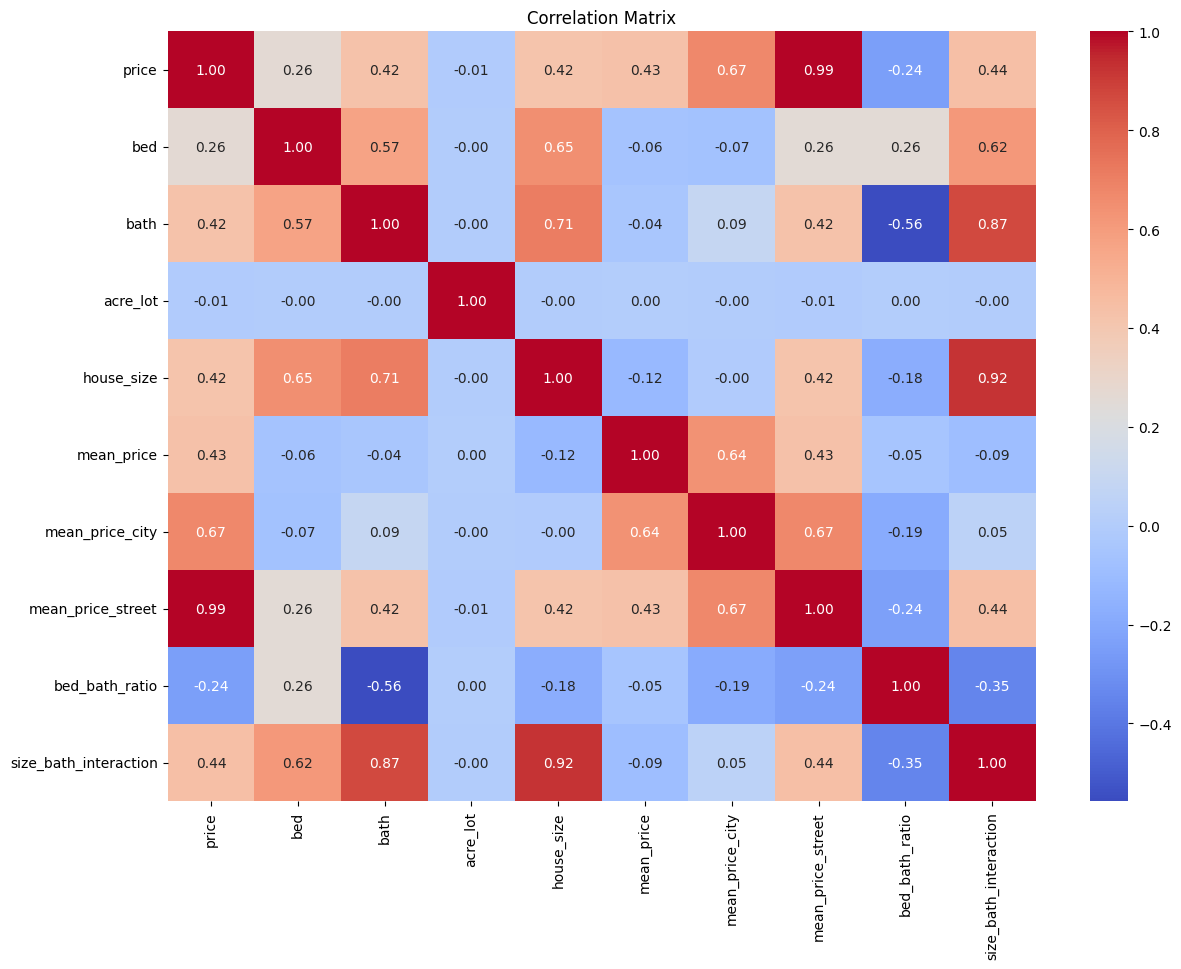

In [ ]:
# correlation matrix
num_columns = real_estate_data_final.select_dtypes(include='number')

cor_matrix_clean2 = num_columns.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(cor_matrix_clean2, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Remove selected columns from real_estate_data_final
real_estate_data_final = real_estate_data_final.drop(
    columns=["brokered_by", "bed", "bath", "acre_lot", "street", "zip_code",
             "house_size", "prev_sold_date", "mean_price", "mean_price_city",
             "mean_price_street", "bed_bath_ratio"]
)


In [ ]:
# Filter out rows where 'status' is 'sold'
real_estate_data_final = real_estate_data_final[real_estate_data_final['status'] != 'sold']

# Convert 'status' to dummy variables: 1 for 'for_sale' and 0 for 'ready_to_build'
real_estate_data_final['status'] = real_estate_data_final['status'].replace({'for_sale': 1, 'ready_to_build': 0})


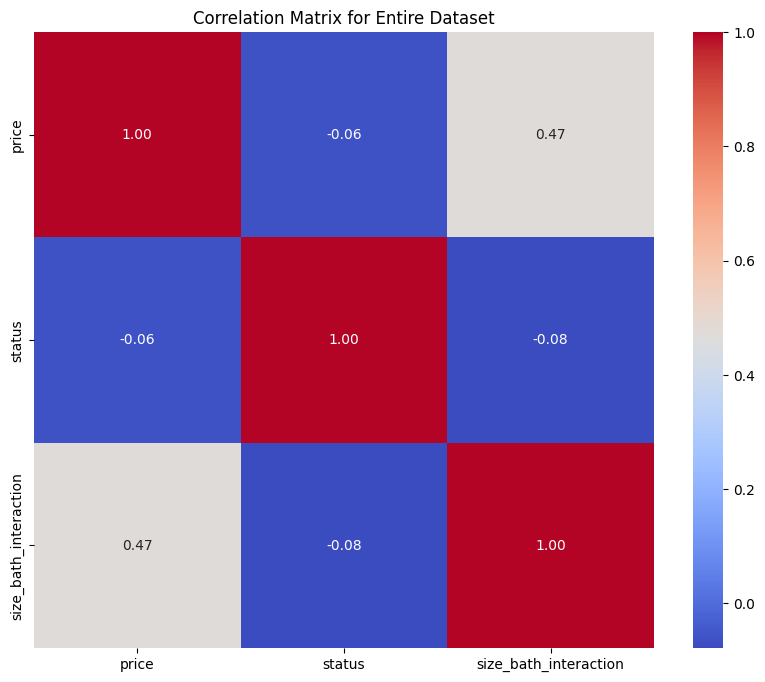

In [ ]:
# Select relevant numeric columns and calculate the correlation matrix
numeric_data_clean3 = real_estate_data_final[['price', 'status', 'size_bath_interaction']]
corr_matrix = numeric_data_clean3.corr()

# Plot the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Entire Dataset')
plt.show()


In [ ]:
# Drop the 'status' column from the real_estate_data_final DataFrame
real_estate_data_final = real_estate_data_final.drop(columns=['status'])

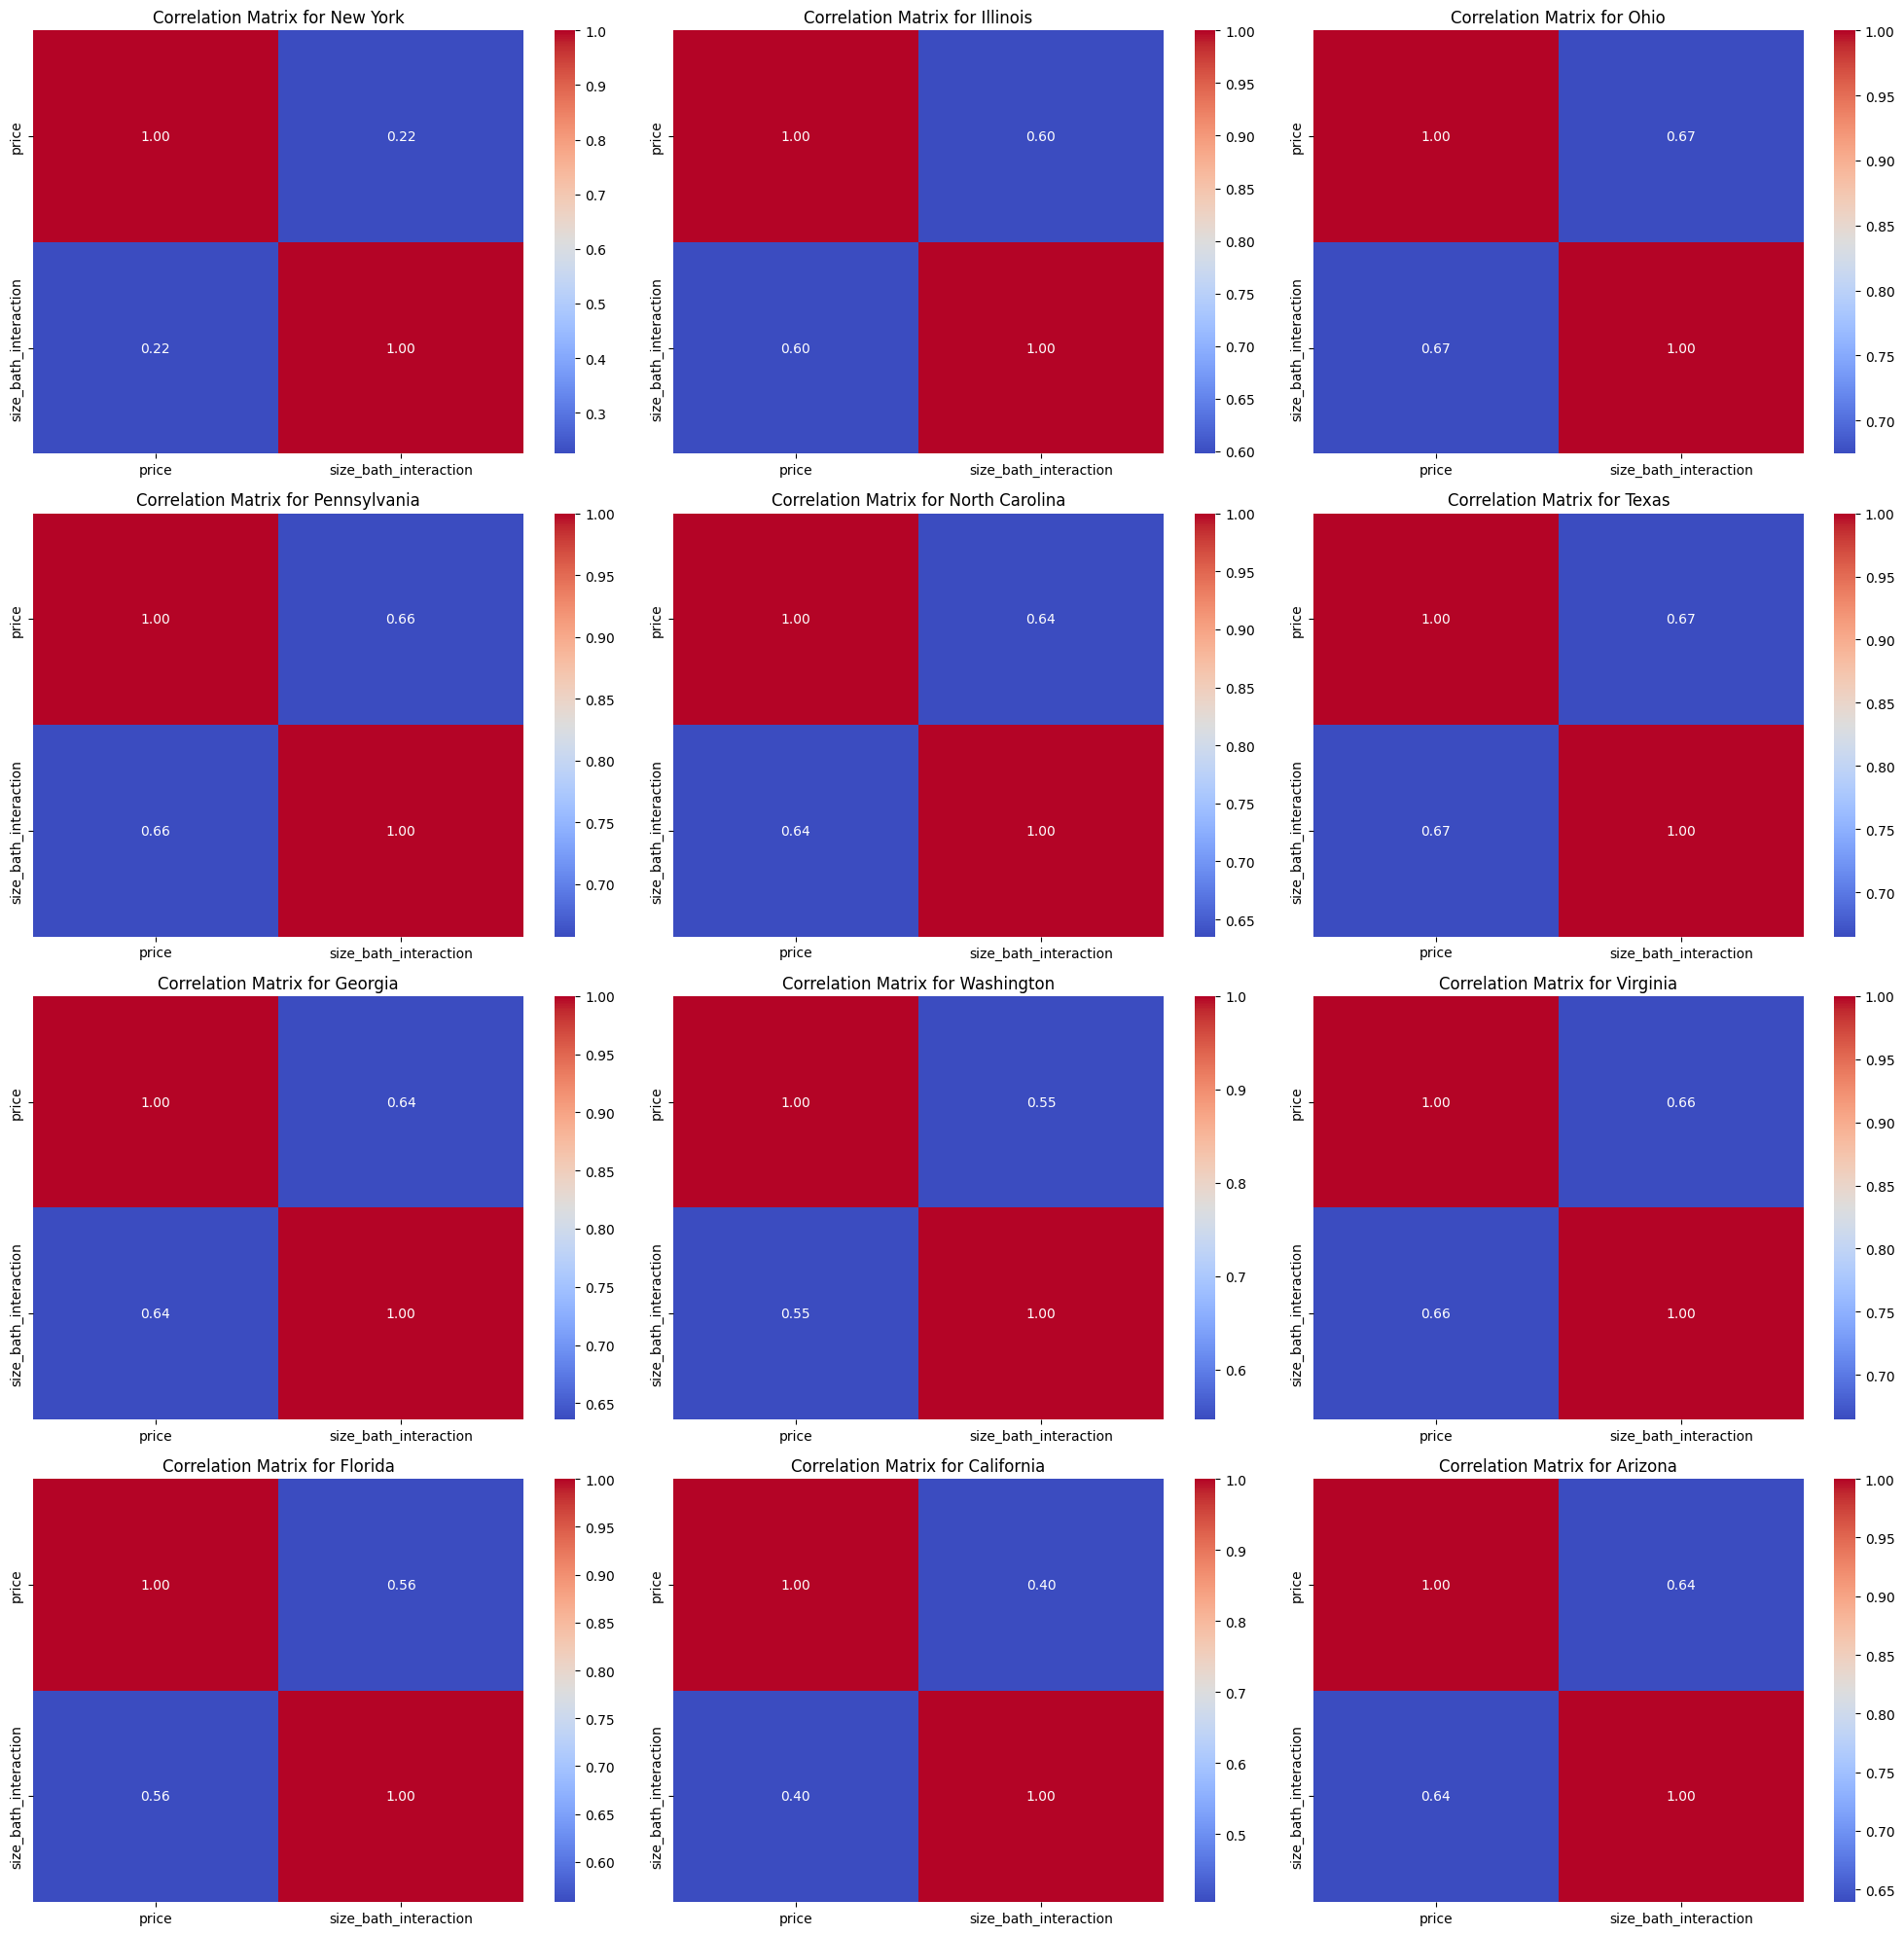

In [ ]:
# Extract unique states and define subplot grid size
states = real_estate_data_final['state'].unique()
n_states = len(states)
n_cols = 3
n_rows = (n_states + n_cols - 1) // n_cols

# Set up the figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Iterate over states to compute and plot correlation matrices
for i, state in enumerate(states):
    state_data = real_estate_data_final[real_estate_data_final['state'] == state][['price', 'size_bath_interaction']]
    state_corr_matrix = state_data.corr()

    ax = axes[i // n_cols, i % n_cols]
    sns.heatmap(state_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title(f'Correlation Matrix for {state}')

# Remove unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [ ]:
# Identify states where the correlation between price and size-bath interaction is greater than 0.65
states = real_estate_data_final['state'].unique()
filtered_states = []

for state in states:
    state_data = real_estate_data_final[real_estate_data_final['state'] == state]
    if {'price', 'size_bath_interaction'}.issubset(state_data.columns):
        correlation = state_data[['price', 'size_bath_interaction']].corr().at['price', 'size_bath_interaction']
        if correlation > 0.65:
            filtered_states.append(state)

# Keep only rows from states with high correlation
real_estate_data_final = real_estate_data_final[real_estate_data_final['state'].isin(filtered_states)].reset_index(drop=True)


In [ ]:
# Filter to keep only the top N cities by record count for each state

# Set the number of top cities to keep
N = 20

# Count the records for each city within each state
city_counts = real_estate_data_final.groupby(['state', 'city']).size().reset_index(name='counts')

# Determine the top N cities per state
top_cities = city_counts.groupby('state').apply(lambda x: x.nlargest(N, 'counts')).reset_index(drop=True)

# Merge with the original dataset to retain only the top cities
real_estate_final = real_estate_data_final.merge(top_cities[['state', 'city']], on=['state', 'city'])


In [ ]:
# Convert categorical columns to dummy variables and ensure binary encoding

# Convert 'state' and 'city' to categorical types
real_estate_final[['state', 'city']] = real_estate_final[['state', 'city']].astype('category')

# Generate dummy variables for 'state' and 'city', omitting the first category to prevent multicollinearity
final_data = pd.get_dummies(real_estate_final, columns=['state', 'city'], drop_first=True)

# Convert dummy variables to binary (0s and 1s)
final_data.loc[:, final_data.filter(like='state_').columns] = final_data.filter(like='state_').astype(int)
final_data.loc[:, final_data.filter(like='city_').columns] = final_data.filter(like='city_').astype(int)

# Display the final DataFrame with dummy variables
final_data


,price,size_bath_interaction,state_Pennsylvania,state_Texas,state_Virginia,city_Alexandria,city_Amarillo,city_Arlington,city_Ashburn,city_Austin,...,city_Virginia Beach,city_Warren,city_Washington Township,city_West Chester,city_Westerville,city_Williamsburg,city_Winchester,city_Woodbridge,city_York,city_Youngstown
0,165000.0,3448.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,155000.0,1264.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,249900.0,5736.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,749000.0,11544.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,294900.0,5544.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66061,474000.0,12800.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66062,439000.0,7989.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66063,515000.0,12900.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66064,575000.0,14440.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling and Results

In [ ]:
# Train and evaluate Linear Regression and Random Forest models, calculating metrics including MSE, RMSE, R^2, Adjusted R^2, F-statistic, and p-value

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f

# Define the features and target variable
X = final_data.drop(columns=['price'])
y = final_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store the results
results = {}

# Function to calculate adjusted R^2
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Function to calculate the F-statistic and p-value
def f_statistic_and_p_value(y_true, y_pred, k):
    n = len(y_true)
    rss = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    f_stat = ((tss - rss) / k) / (rss / (n - k - 1))
    p_value = 1 - f.cdf(f_stat, k, n - k - 1)
    return f_stat, p_value

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'RandomForest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    n = X_test.shape[0]
    k = X_test.shape[1]
    adj_r2 = adjusted_r2_score(r2, n, k)
    f_stat, p_value = f_statistic_and_p_value(y_test, y_pred, k)
    results[name] = [mse, rmse, r2, adj_r2, f_stat, p_value]

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, index=['MSE', 'RMSE', 'R^2', 'Adjusted R^2', 'F-statistic', 'p-value']).T
results_df


,MSE,RMSE,R^2,Adjusted R^2,F-statistic,p-value
Linear Regression,1.457283e+10,120717.991588,0.592180,0.589665,235.413496,1.110223e-16
RandomForest Regression,1.501144e+10,122521.167520,0.579906,0.577315,223.798291,1.110223e-16


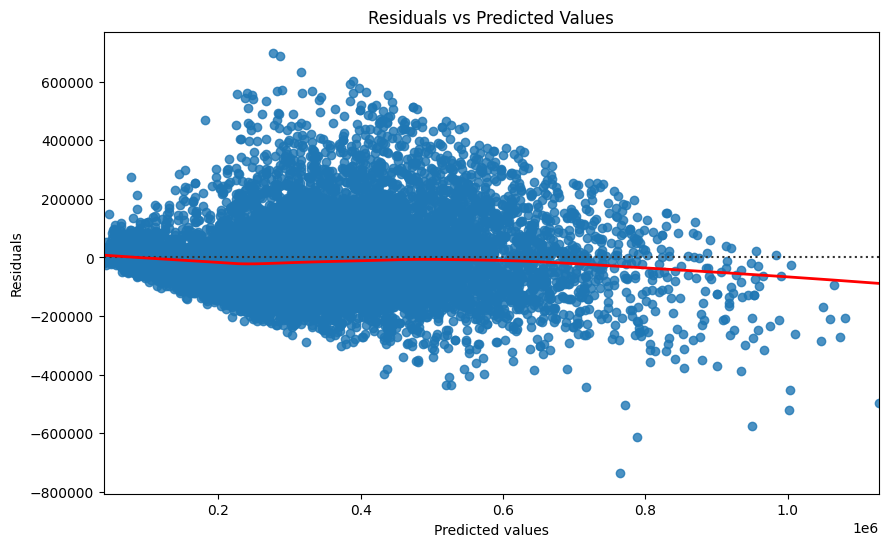

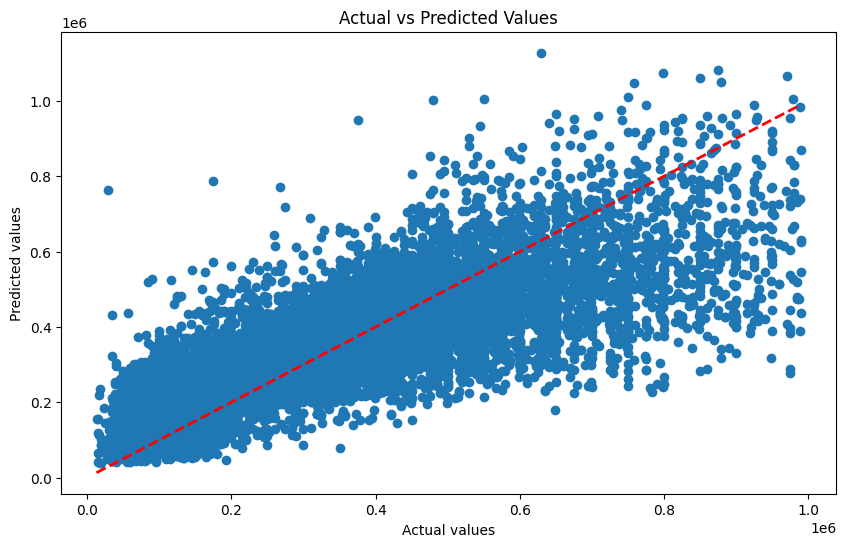

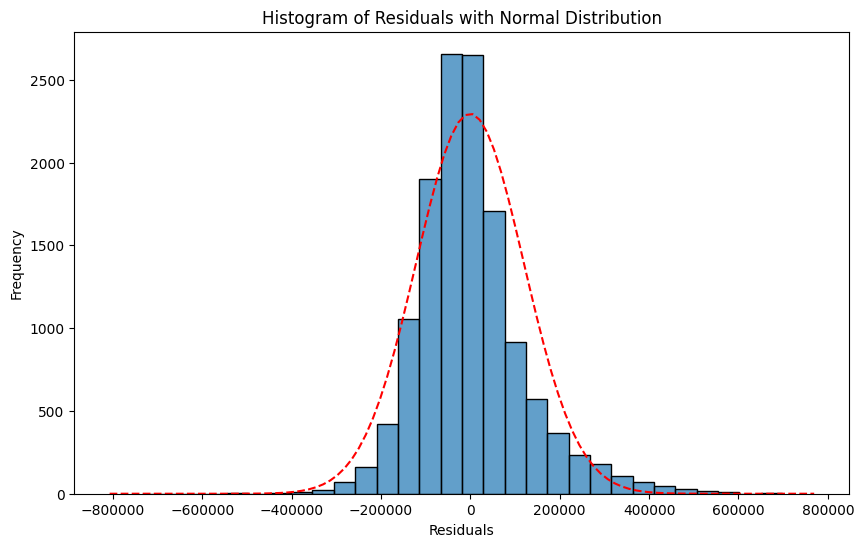

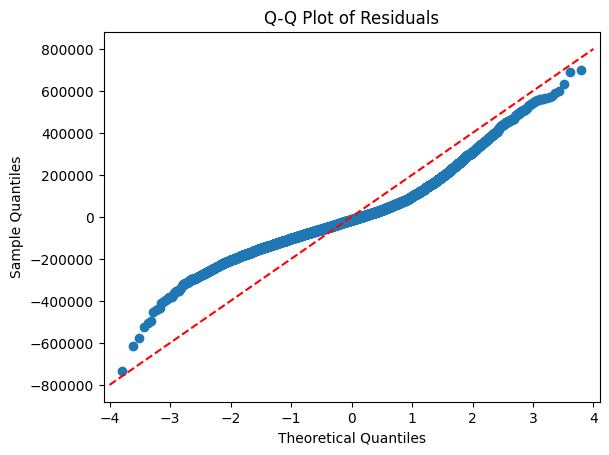

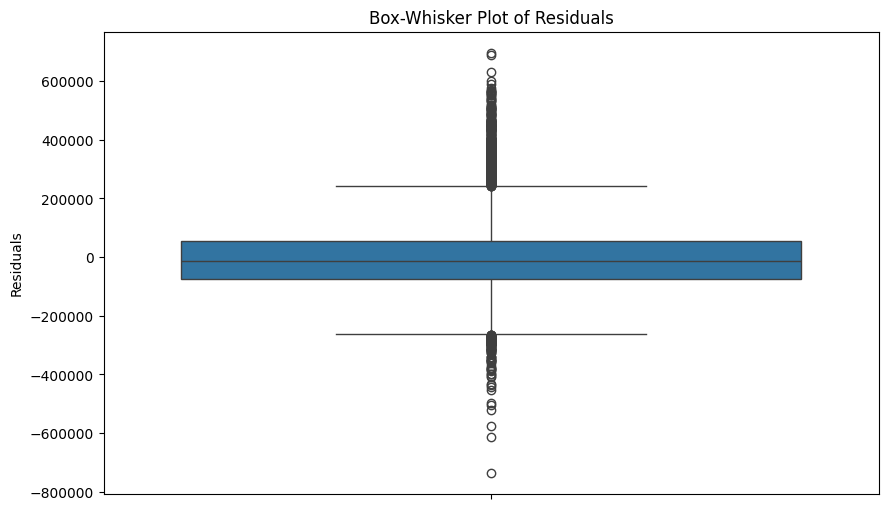

In [ ]:
# Import necessary libraries for plotting and statistical analysis
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Define functions to visualize model performance
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.show()

def plot_prediction_vs_actual(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Actual vs Predicted Values')
    plt.show()

def plot_residual_histogram(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, bins=30, kde=False, edgecolor='k', alpha=0.7)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, np.mean(residuals), np.std(residuals))
    plt.plot(x, p * len(residuals) * (xmax - xmin) / 30, 'r--')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals with Normal Distribution')
    plt.show()

def plot_qq(y_test, y_pred):
    residuals = y_test - y_pred
    sm.qqplot(residuals)
    plt.title('Q-Q Plot of Residuals')
    plt.xlim([-4.1, 4.1])
    plt.plot([-4, 4], [-800000, 800000], 'r--')
    plt.show()

def plot_box_whisker(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=residuals)
    plt.title('Box-Whisker Plot of Residuals')
    plt.ylabel('Residuals')
    plt.show()

# Using the best overall model for visualization
best_model_name = 'Linear Regression'
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

# Visualize model performance
plot_residuals(y_test, y_pred)
plot_prediction_vs_actual(y_test, y_pred)
plot_residual_histogram(y_test, y_pred)
plot_qq(y_test, y_pred)
plot_box_whisker(y_test, y_pred)
